In [131]:
import json
import pandas as pd
import csv
import numpy as np
import mysql.connector
import pymysql
import  matplotlib.pyplot as plt
import  seaborn as sns
import warnings
from collections import Counter
from itertools import chain
fig_size = [80, 80]
plt.rcParams['figure.figsize'] = fig_size
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
import sys
# !{sys.executable} -m pip install pandas-profiling
# !{sys.executable} -m pip install pymysql


In [254]:
df_data = pd.read_csv('board_game_data.csv')

In [255]:
df_data.columns = ['board_game_id','name','year','minplayer','maxplayer','playingtime','avgratings','designer','category','mechanic','publisher','age','rank']

In [256]:
df_data.head()

,board_game_id,name,year,minplayer,maxplayer,playingtime,avgratings,designer,category,mechanic,publisher,age,rank
0,2,Dragonmaster,1981,3,4,30,6.61384,"G. W. ""Jerry"" D'Arcey",Card Game:Fantasy,Trick-taking,E.S. Lowe:Milton Bradley,12,3450
1,3,Samurai,1998,2,4,60,7.44238,Reiner Knizia,Abstract Strategy:Medieval,Area Majority / Influence:Hand Management:Set ...,Fantasy Flight Games:Hans im Gluck:999 Games,10,200
2,4,Tal der Konige,1992,2,4,60,6.60429,Christian Beierer,Ancient,Action Points:Area Majority / Influence:Auctio...,KOSMOS,12,4561
3,5,Acquire,1964,2,6,90,7.34534,Sid Sackson,Economic,Hand Management:Investment:Market,"3M:The Avalon Hill Game Co:Avalon Hill Games, ...",12,248
4,6,Mare Mediterraneum,1989,2,6,240,6.51062,Jean du Poel,Civilization:Nautical,Dice Rolling,Historien Spiele Galerie (Historien Spielegale...,12,9295


In [257]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29673 entries, 0 to 29672
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   board_game_id  29673 non-null  int64  
 1   name           29673 non-null  object 
 2   year           29673 non-null  int64  
 3   minplayer      29673 non-null  int64  
 4   maxplayer      29673 non-null  int64  
 5   playingtime    29673 non-null  int64  
 6   avgratings     29673 non-null  float64
 7   designer       29144 non-null  object 
 8   category       29301 non-null  object 
 9   mechanic       26173 non-null  object 
 10  publisher      29670 non-null  object 
 11  age            29673 non-null  int64  
 12  rank           29673 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.9+ MB


In [258]:
board_game_data = df_data.fillna('not define')

In [259]:
board_game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29673 entries, 0 to 29672
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   board_game_id  29673 non-null  int64  
 1   name           29673 non-null  object 
 2   year           29673 non-null  int64  
 3   minplayer      29673 non-null  int64  
 4   maxplayer      29673 non-null  int64  
 5   playingtime    29673 non-null  int64  
 6   avgratings     29673 non-null  float64
 7   designer       29673 non-null  object 
 8   category       29673 non-null  object 
 9   mechanic       29673 non-null  object 
 10  publisher      29673 non-null  object 
 11  age            29673 non-null  int64  
 12  rank           29673 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.9+ MB


In [260]:
board_game_data['designer'] = board_game_data['designer'].str.replace(':',', ')
board_game_data['category'] = board_game_data['category'].str.replace(':',', ')
board_game_data['mechanic'] = board_game_data['mechanic'].str.replace(':',', ')
board_game_data['publisher'] = board_game_data['publisher'].str.replace(':',', ')

Text(0.5, 1.0, 'Player range count')

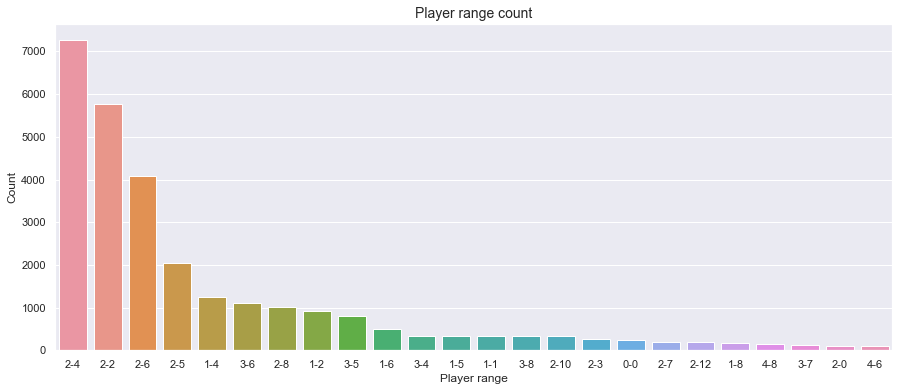

In [261]:
board_game_data['player_range'] = board_game_data['minplayer'].astype(str) + '-' + board_game_data['maxplayer'].astype(str)
player_range =  board_game_data['player_range'].value_counts()
player_range = player_range[player_range > 100]
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(x = player_range.index, y= player_range)
ax.set(xlabel='Player range', ylabel = 'Count')
plt.title('Player range count', fontsize=14)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Year')]

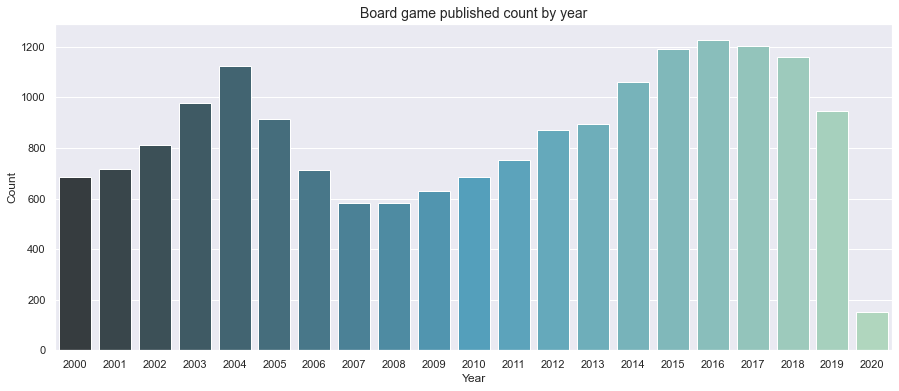

In [262]:
board_game_data_year = board_game_data[board_game_data['year'] > 1999]
game_count = board_game_data_year['year'].value_counts()
game_count = game_count[game_count > 25]
f, ax = plt.subplots(figsize = (15, 6))
sns.set_palette("coolwarm", 7)
sns.barplot(x = game_count.index, y = game_count, palette=("GnBu_d"))
plt.title('Board game published count by year', fontsize=14)
ax.set(xlabel='Year', ylabel = 'Count')

In [263]:
board_game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29673 entries, 0 to 29672
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   board_game_id  29673 non-null  int64  
 1   name           29673 non-null  object 
 2   year           29673 non-null  int64  
 3   minplayer      29673 non-null  int64  
 4   maxplayer      29673 non-null  int64  
 5   playingtime    29673 non-null  int64  
 6   avgratings     29673 non-null  float64
 7   designer       29673 non-null  object 
 8   category       29673 non-null  object 
 9   mechanic       29673 non-null  object 
 10  publisher      29673 non-null  object 
 11  age            29673 non-null  int64  
 12  rank           29673 non-null  int64  
 13  player_range   29673 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 3.2+ MB


In [264]:
board_game_data.sort_values('rank')

,board_game_id,name,year,minplayer,maxplayer,playingtime,avgratings,designer,category,mechanic,publisher,age,rank,player_range
14836,18081,Australian Menagerie: Coral Reef Habitat,2004,2,6,30,6.81250,"Pat Darlington, Dan Nicholls","Animals, Card Game, Educational",Set Collection,Wild Connections,6,0,2-6
15595,19525,Sibling Rivalry,2004,2,5,20,4.83333,Richard Garfield,"Dice, Humor",Dice Rolling,MIT Press,0,0,2-5
15594,19520,Counter Punch,2003,2,2,0,1.00000,Mario Jones,"Card Game, Sports",Trick-taking,Counter Punch LLC,0,0,2-2
15593,19516,Waarom? Daarom!,1998,3,16,45,5.07143,(Uncredited),"Party Game, Trivia",Paper-and-Pencil,Jumbo,14,0,3-16
9627,11128,Bastogne: Crossroads of Death,1991,2,2,0,5.67619,James Meldrum,"Wargame, World War II",Hexagon Grid,Pacific Rim Publishing,12,0,2-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1406,Monopoly,1933,2,8,180,4.35963,"Charles Darrow, Elizabeth J. Magie (Phillips)","Economic, Negotiation","Auction/Bidding, Income, Lose a Turn","(Unknown), Ahlen & Akerlund, Alga",8,18873,2-8
3108,3522,LCR,1983,3,12,20,3.36396,(Uncredited),Dice,Dice Rolling,"Cardinal, George & Company, Imagination Games",5,18874,3-12
1198,1410,Trouble,1965,2,4,45,3.79464,"Frank Kohner, Paul Kohner, Fred Kroll","Children's Game, Racing",Roll / Spin and Move,"(Unknown), Amuze, The Canadian Group",4,18875,2-4
2567,2921,The Game of Life,1960,2,6,60,4.28289,"Reuben Klamer, Bill Markham","Children's Game, Economic","Roll / Spin and Move, Simulation","Alga, Basic Fun, Inc., Estrela",8,18876,2-6


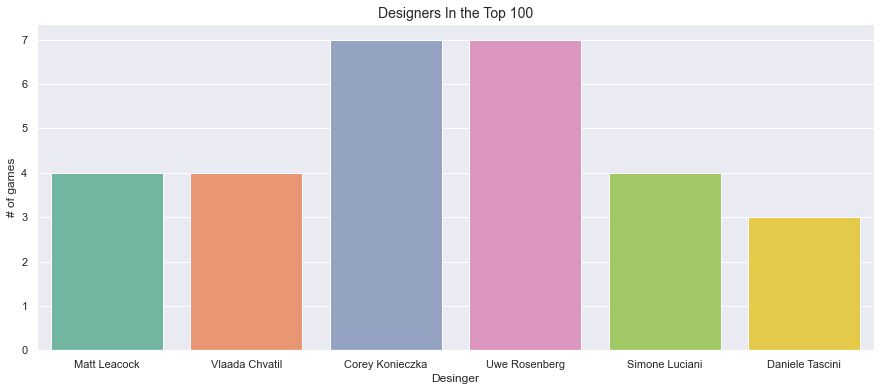

{'Matt Leacock': 4,
 'Vlaada Chvatil': 4,
 'Corey Konieczka': 7,
 'Uwe Rosenberg': 7,
 'Simone Luciani': 4,
 'Daniele Tascini': 3}

In [270]:
board_game_data_desinger = board_game_data[board_game_data['designer'] != '(Uncredited)']
board_game_data_desinger = board_game_data_desinger[board_game_data_desinger['rank'] != 0]
board_game_data_desinger = board_game_data_desinger.sort_values('rank')
top_designers= board_game_data_desinger[:100]['designer'].tolist()
top_designers = [designer.split(', ') for designer in top_designers]
top_designers = chain(*top_designers)
# top_designers = [name.replace(' ', '\n') for name in top_designers ]
top_designers_count = Counter(top_designers)
top_designers_count = {name:top_designers_count[name] for name in top_designers_count if top_designers_count[name] > 2}
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x=[str(i) for i in top_designers_count.keys()], y=[i for i in top_designers_count.values()], palette=("Set2"))
ax.set(xlabel='Desinger', ylabel = '# of games')
plt.title('Designers In the Top 100', fontsize=14)
plt.xticks(rotation=0)
plt.show()
top_designers_count

In [267]:
board_game_data_desinger[:100]

,board_game_id,name,year,minplayer,maxplayer,playingtime,avgratings,designer,category,mechanic,publisher,age,rank,player_range
24528,174430,Gloomhaven,2017,1,4,120,8.83240,Isaac Childres,"Adventure, Exploration, Fantasy","Action Retrieval, Campaign / Battle Card Drive...","Cephalofair Games, Albi, Asmodee",12,1,1-4
23689,161936,Pandemic Legacy: Season 1,2015,2,4,60,8.62370,"Rob Daviau, Matt Leacock","Environmental, Medical","Action Points, Cooperative Game, Hand Management","Z-Man Games, Inc., Asterion Press, Devir",13,2,2-4
24065,167791,Terraforming Mars,2016,1,5,120,8.42734,Jacob Fryxelius,"Economic, Environmental, Industry / Manufacturing","Card Drafting, End Game Bonuses, Hand Management","FryxGames, Arclight, Fantasmagoria",12,3,1-5
27172,224517,Brass: Birmingham,2018,2,4,120,8.63476,"Gavan Brown, Matt Tolman, Martin Wallace","Economic, Industry / Manufacturing, Transporta...","Connections, Hand Management, Income","Roxley, BoardM Factory, Conclave Editora",14,4,2-4
25071,182028,Through the Ages: A New Story of Civilization,2015,2,4,120,8.46966,Vlaada Chvatil,"Card Game, Civilization, Economic","Action Points, Auction/Bidding, Auction, Dutch","Czech Games Edition, Cranio Creations, Devir",14,5,2-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,161970,Alchemists,2014,2,4,120,7.68457,Matus Kotry,"Deduction, Fantasy","Action Drafting, Card Drafting, Constrained Bi...","Czech Games Edition, Arclight, Cranio Creations",13,97,2-4
20803,104162,Descent: Journeys in the Dark (Second Edition),2012,1,5,120,7.70459,"Daniel Clark (I), Corey Konieczka, Adam Sadler","Adventure, Exploration, Fantasy","Action Points, Dice Rolling, Grid Movement","Fantasy Flight Games, ADC Blackfire Entertainm...",14,98,1-5
22961,150376,Dead of Winter: A Crossroads Game,2014,2,5,120,7.60982,"Jonathan Gilmour, Isaac Vega","Bluffing, Deduction, Horror","Action Points, Area Movement, Cooperative Game","Plaid Hat Games, Arclight, Asmodee Italia",13,99,2-5
27626,233371,Clank! In! Space!,2017,2,4,90,7.87716,Paul Dennen,Science Fiction,"Card Drafting, Deck, Bag, and Pool Building, M...","Dire Wolf Digital, Renegade Game Studios, Lucr...",12,100,2-4


In [216]:
board_game_data_desinger.head(30)

,board_game_id,name,year,minplayer,maxplayer,playingtime,avgratings,designer,category,mechanic,publisher,age,rank,player_range
20212,174430,Gloomhaven,2017,1,4,120,8.83240,Isaac Childres,"Adventure, Exploration, Fantasy","Action Retrieval, Campaign / Battle Card Drive...","Cephalofair Games, Albi, Asmodee",12,1,1-4
22777,233078,Twilight Imperium (Fourth Edition),2017,3,6,480,8.69011,"Dane Beltrami, Corey Konieczka, Christian T. P...","Civilization, Economic, Negotiation","Action Drafting, Area Majority / Influence, Ar...","Fantasy Flight Games, ADC Blackfire Entertainm...",14,6,3-6
22261,220308,Gaia Project,2017,1,4,150,8.49831,"Jens Drogemuller, Helge Ostertag","Civilization, Economic, Science Fiction","Area Majority / Influence, End Game Bonuses, H...","Feuerland Spiele, Capstone Games, Cranio Creat...",12,9,1-4
19574,162886,Spirit Island,2017,1,4,120,8.32051,R. Eric Reuss,"Age of Reason, Environmental, Fantasy","Action Retrieval, Area Majority / Influence, C...","Greater Than Games, Ace Studios, Arrakis Games",13,13,1-4
17512,120677,Terra Mystica,2012,2,5,150,8.16223,"Jens Drogemuller, Helge Ostertag","Civilization, Economic, Fantasy","End Game Bonuses, Hexagon Grid, Income","Feuerland Spiele, Bard Centrum Gier, Capstone ...",12,15,2-5
17639,124361,Concordia,2013,2,5,100,8.11407,Mac Gerdts,"Ancient, Economic, Nautical","Action Retrieval, Advantage Token, Card Drafting","PD-Verlag, 999 Games, Cranio Creations",13,17,2-5
20551,180263,The 7th Continent,2017,1,4,1000,8.30115,"Ludovic Roudy, Bruno Sautter","Adventure, Card Game, Exploration","Cooperative Game, Grid Movement, Hand Management","Serious Poulp, Pegasus Spiele",14,19,1-4
1984,3076,Puerto Rico,2002,3,5,150,8.01209,Andreas Seyfarth,"City Building, Economic, Farming","Action Drafting, End Game Bonuses, Follow","alea, Ravensburger Spieleverlag GmbH, Devir",12,24,3-5
16914,96848,Mage Knight Board Game,2011,1,4,240,8.09861,Vlaada Chvatil,"Adventure, Exploration, Fantasy","Card Drafting, Cooperative Game, Deck, Bag, an...","WizKids, Asmodee, Giochi Uniti",14,25,1-4
20307,175914,Food Chain Magnate,2015,2,5,240,8.16163,"Jeroen Doumen, Joris Wiersinga","Economic, Industry / Manufacturing","Card Drafting, Deck, Bag, and Pool Building, I...","Splotter Spellen, Angry Lion Games, New Games ...",14,28,2-5


[Text(0.5, 30.199999999999996, 'player count')]

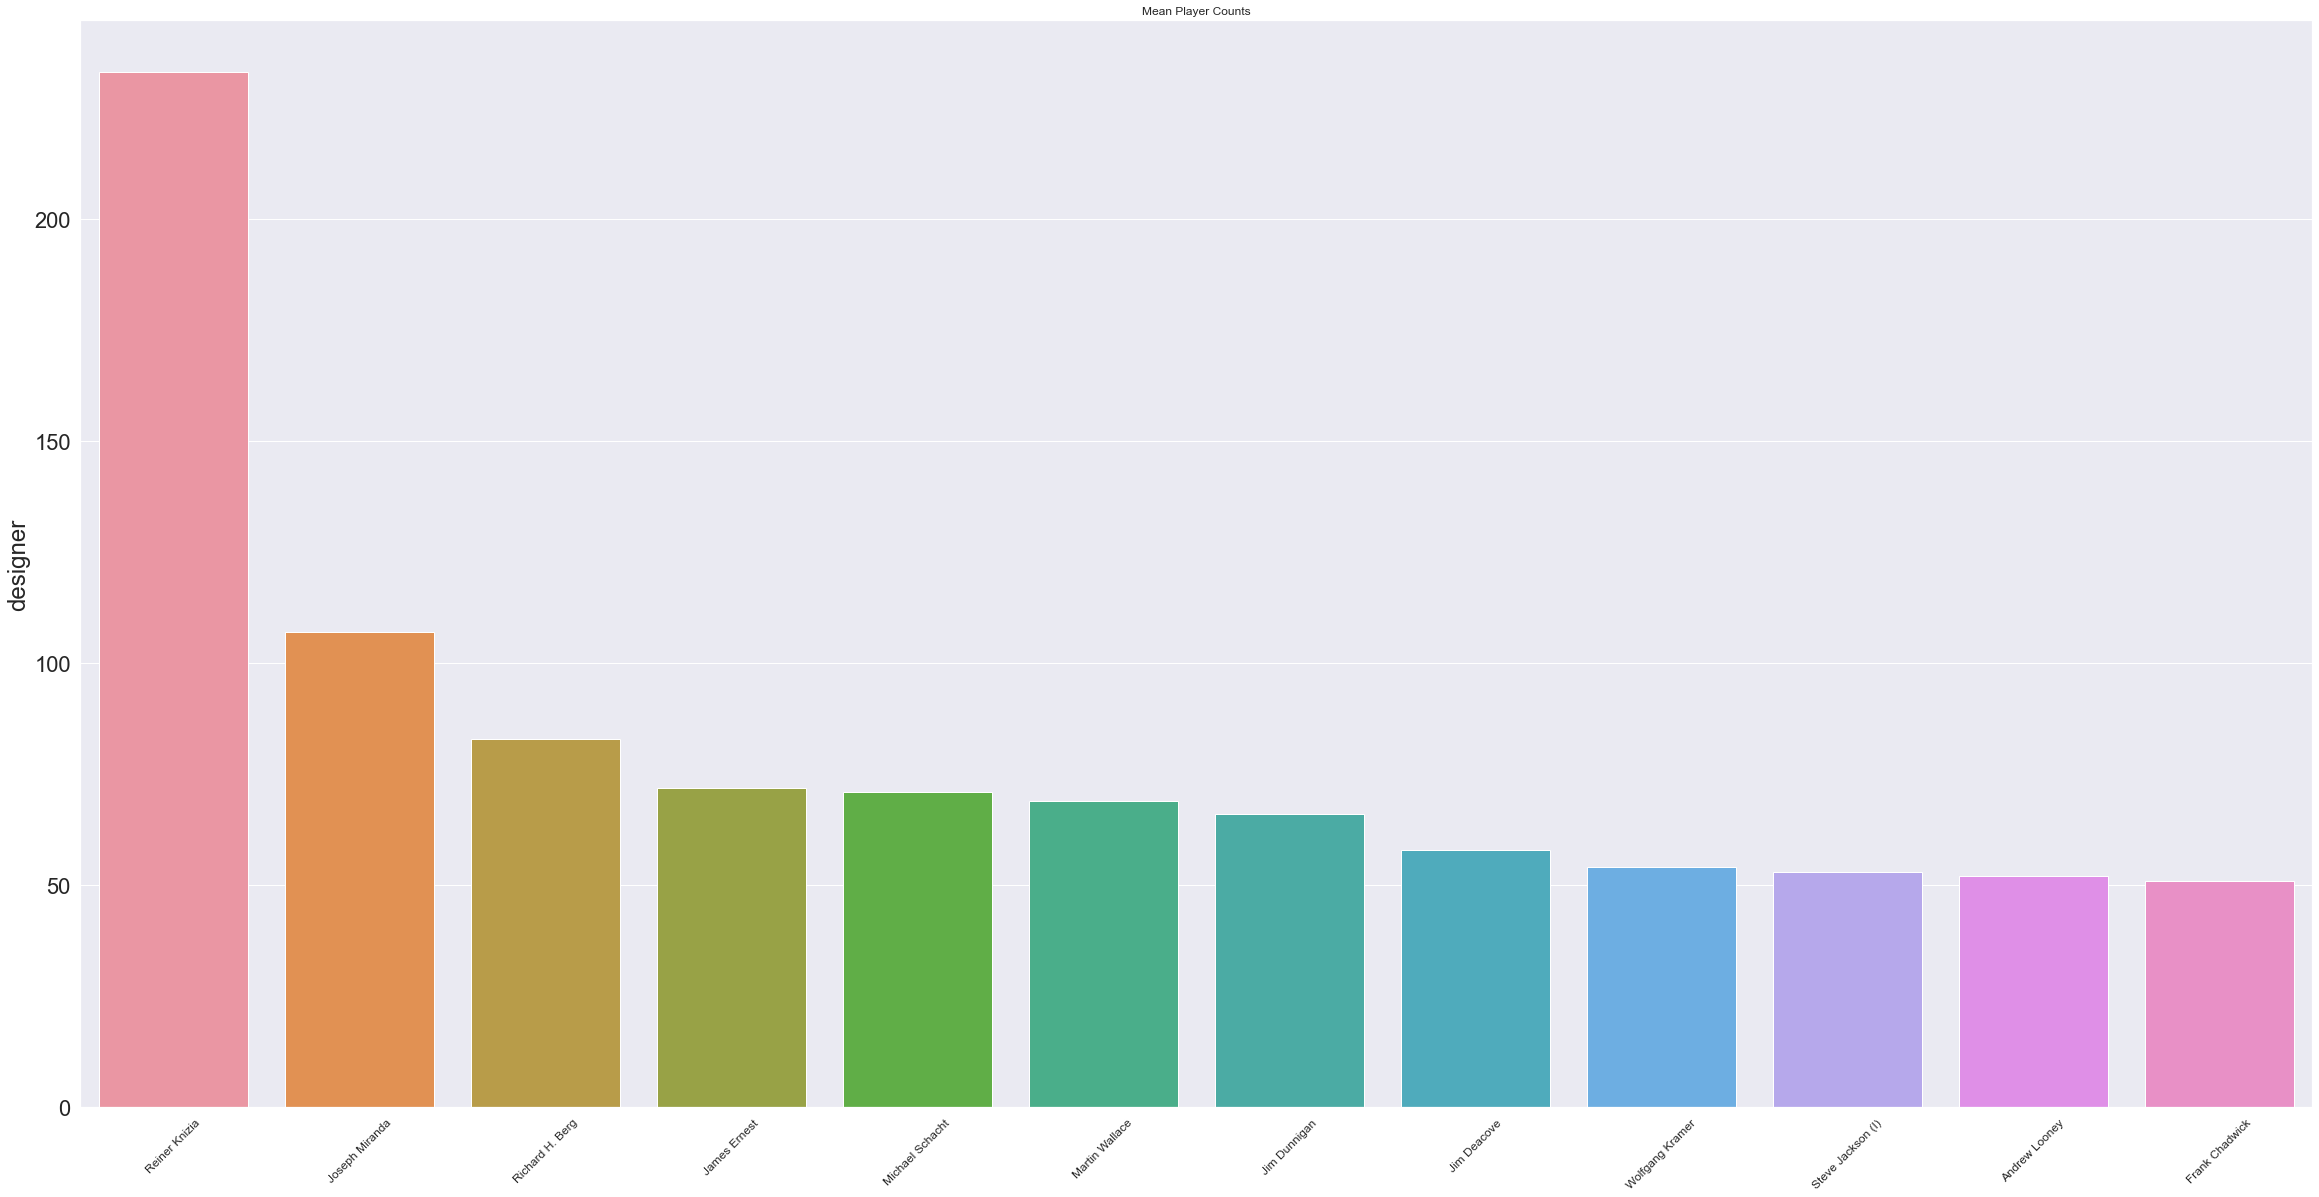

In [184]:
board_game_data_desinger = board_game_data[board_game_data['designer'] != '(Uncredited)']
board_game_data_desinger = board_game_data_desinger[board_game_data['designer'] != 'not define']
board_game_data_desinger = board_game_data_desinger[board_game_data['designer'] != ' ']

designer_count = board_game_data_desinger['designer'].value_counts()
designer_count = designer_count[designer_count > 50]
sns.barplot(x = designer_count.index, y = designer_count)
plt.title('Mean Player Counts', size=12)
plt.xticks(rotation=45, size = 12)
ax.set(xlabel='player count')

In [167]:
designer_count

Reiner Knizia            235
Richard H. Berg          131
Joseph Miranda           110
James Ernest             106
Jim Dunnigan              79
Michael Schacht           72
Ty Bomba                  69
Martin Wallace            69
Dean Essig                68
Frank Chadwick            68
Wolfgang Kramer           68
Steve Jackson (I)         65
Bruno Cathala             60
Jim Deacove               58
Andrew Looney             54
Klaus Teuber              51
Dan Verssen               50
Alan R. Moon              50
Michael Bennighof         50
Uwe Rosenberg             47
Stephen V. Cole           47
Perry Moore               46
Mike Elliott              45
Leo Colovini              44
Alex Randolph             44
Matt Hyra                 43
Garrett J. Donner         43
Sid Sackson               43
Reinhold Wittig           42
Frederic Bey              41
Robert G. Markham         39
Marco Donadoni            39
Gunter Burkhardt          38
D. Brad Talton, Jr.       37
Friedemann Fri